In [2]:
import sys
sys.path.insert(0, "..")

In [3]:
from utils import access_raster
from glob import glob
import re
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.stats import gaussian_kde
import seaborn as sns
import random
from scipy import optimize

In [4]:
model = "final_snowprob_1692788122_model_53_01269"
# model = "1684923533_model_57_012345678"
feature = "HS"
# predfile = "HS_diff.tif"
predfile = "HS_pred.tif"

hs_path = f"/home/abetatos/Escritorio/TFM_Dataset/3.Basedataset/{feature}"
modelpredspath = f"/home/abetatos/Escritorio/TFM_Dataset/5.Preds/{model}"

In [36]:
import pandas as pd

def get_slices(aux, precision): 
    df = pd.DataFrame(aux)
    df[0] = df[0].apply(lambda x: round(x, precision))
    arr = []
    for index, round_df in df.groupby(0):
        arr.append([index, round_df[1].mean()])
    return np.array(arr)

def get_hist(aux, precision): 
    df = pd.DataFrame(aux)
    df[0] = df[0].apply(lambda x: round(x, precision))
    arr = []
    for index, round_df in df.groupby(0):
        arr.append([index, len(round_df)])
    return arr

# With respect labeled

0.21968050301074982 4926.66552734375 2.52


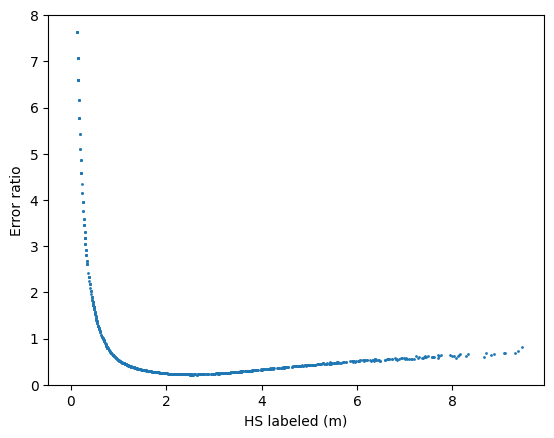

0.4805982708930969 6.953774452209473 1.72


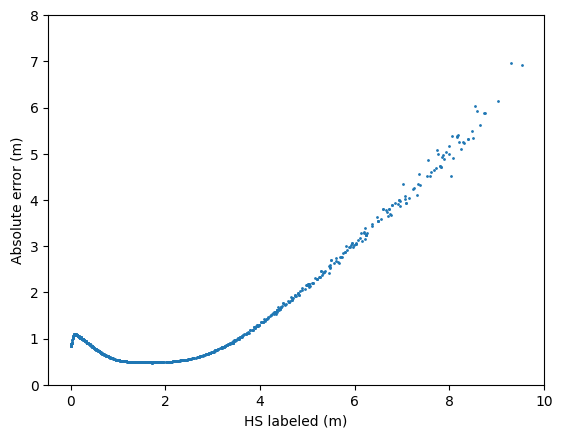

In [20]:
place = "HS_Davos_20170316_2m_epsg2056"



for label, feature, title in zip(["Error ratio", "Absolute error (m)"], ["HS_sigma", "HS_diff"], ["a)", "b)"]):
    fig, ax = plt.subplots()
    feature_raster = access_raster(os.path.join(hs_path, place, f"HS.tif"))['array']

    pred_raster = access_raster(os.path.join(modelpredspath, place, feature+".tif"))['array']

    fr_flat = feature_raster.flatten()
    pr_flat = pred_raster.flatten()

    aux = [[fr, pr] for fr, pr in zip(fr_flat, pr_flat) if fr not in [0., -9999.] and pr not in [0., -9999.]]
    aux = get_slices(aux, 2)
    random.shuffle(aux)
    fr_flat, pr_flat = np.array(list(zip(*aux[:10000])))
    print(pr_flat.min(), pr_flat.max(), fr_flat[pr_flat.argmin()])
    
    ax.scatter(fr_flat, pr_flat, s=1)
    
    ax.set_ylim(0, 8)
    ax.set_ylabel(label)
    ax.set_xlabel("HS labeled (m)")

    plt.show()

# With respect predictions

0.1773117333650589 1906954752.0 5.25


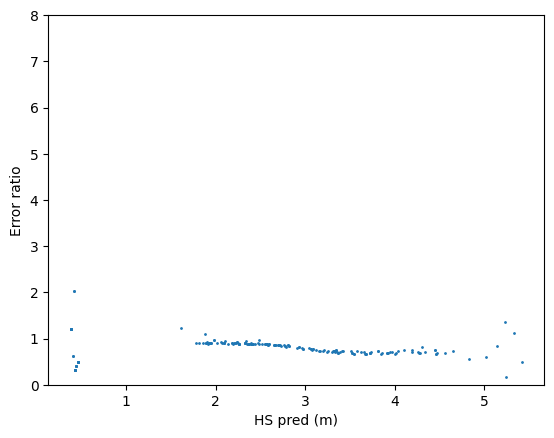

0.267341673374176 5.016092300415039 0.45


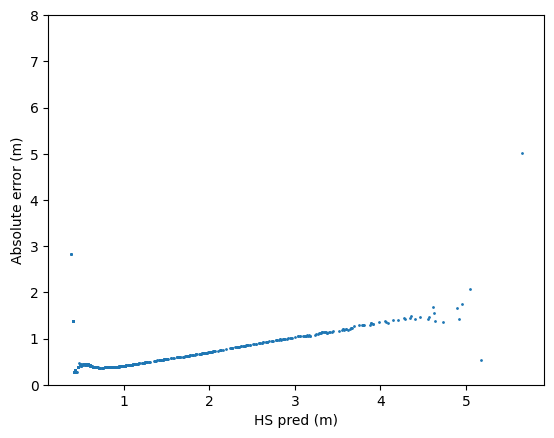

In [47]:
for label, feature, title in zip(["Error ratio", "Absolute error (m)"], ["HS_sigma", "HS_diff"], ["a)", "b)"]):
    fig, ax = plt.subplots()

    feature_raster = access_raster(os.path.join(modelpredspath, place, "HS_pred"+".tif"))['array']
    pred_raster = access_raster(os.path.join(modelpredspath, place, feature+".tif"))['array']

    fr_flat = feature_raster.flatten()
    pr_flat = pred_raster.flatten()

    aux = [[fr, pr] for fr, pr in zip(fr_flat, pr_flat) if fr not in [0., -9999.] and pr not in [0., -9999.]]
    aux = get_slices(aux, 2)
    random.shuffle(aux)
    fr_flat, pr_flat = np.array(list(zip(*aux[:10000])))
    print(pr_flat.min(), pr_flat.max(), fr_flat[pr_flat.argmin()])
    
    ax.scatter(fr_flat, pr_flat, s=1)
    
    ax.set_ylim(0, 8)
    ax.set_ylabel(label)
    ax.set_xlabel("HS pred (m)")

    plt.show()

In [49]:
feature_raster.shape, pred_raster.shape

((1, 4916, 6798), (1, 4916, 6798))